# Compare U87MG motility in different cases 

In [1]:
%load_ext autoreload
%autoreload 2

In [30]:
import sys
sys.path.append('../utils')
from track_fns import *

import numpy as np
from matplotlib import pyplot as plt
from LineageTree import lineageTree
import scipy.stats as stats
import xml.etree.ElementTree as ET
import os
# fix for ete 
os.environ['QT_QPA_PLATFORM']='offscreen'
from ete3 import TreeStyle,NodeStyle
plt.rcParams.update({'font.size': 10})

# Load all necessary data

In [150]:
# Load tracks 
print('Exp 22'.center(40,'-'))
dat22_500um,tree22_500um = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/22PD_downscaled/well_6_500TMZ_U87MG.xml')
dat22_control,tree22_control = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/22PD_downscaled/well_1_control_U87MG_3.xml')

dat22_hela_500um,tree22_hela_500um = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/22PD_downscaled/well_12_500TMZ_Helarestored5.xml')
dat22_hela_control,tree22_hela_control = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/22PD_downscaled/well_7_control_Hela.xml')
print('Exp 33'.center(40,'-'))

dat33_500um,tree33_500um = track_to_coords('/mnt/dioscuri-nas/Pragyesh/33PD_030323_TMZ_removal/For_tracking/04_500umalltime-1_new_final5.xml')
dat33_control,tree33_control = track_to_coords('/mnt/dioscuri-nas/Pragyesh/33PD_030323_TMZ_removal/For_tracking/01_Control-1_1505.xml')

print('Exp 40'.center(40,'-'))

dat40_500um,tree40_500um = track_to_coords('/mnt/dioscuri-nas2/Pragyesh/40PD_U87MG_mgmt-OFP_cells_with_filtered_media/For_tracking/well_7_corrected_crop_500uM_TMZ.xml')
dat40_control,tree40_control = track_to_coords('/mnt/dioscuri-nas2/Pragyesh/40PD_U87MG_mgmt-OFP_cells_with_filtered_media/For_tracking/well_4_corrected_crop_control.xml')

print('Exp 54'.center(40,'-'))
dat54_500um,tree54_500um = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/well_F6_TMZ5.xml')
dat54_500um_high,tree54_500um_high = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/well_F6_TMZ5_high4.xml')
dat54_500um_low,tree54_500um_low = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/well_F6_TMZ_non_fluorscent2.xml')

dat54_control,tree54_control = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/well_C6_control3.xml')
dat54_control_high,tree54_control_high = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/well_C6_control3_high.xml')
dat54_control_low,tree54_control_low = track_to_coords('/mnt/dioscuri-nas/Ilyas/Stitched_wells/54PD_downscaled/well_C6_non_fluorescent5.xml')

# And the fluorescence data 
#dat_fluo40_500um = load_from_pickle('/mnt/dioscuri-nas/Ilyas/Results/Cells/40PD_well7_all_cells_imgs_w_fit_bg_new.bin',None)
#dat_fluo40_control = load_from_pickle('/mnt/dioscuri-nas/Ilyas/Results/Cells/40PD_well4_all_cells_imgs_w_fit_bg_new.bin',None)
dat_fluo54_500um = load_from_pickle('/mnt/dioscuri-nas/Ilyas/Results/Cells/54PD_wellF6_all_cells_imgs_w_fit_bg_new.bin',None)
dat_fluo54_500um_high = load_from_pickle('/mnt/dioscuri-nas/Ilyas/Results/Cells/54PD_wellF6_high_all_dets.bin',None)
dat_fluo54_control = load_from_pickle('/mnt/dioscuri-nas/Ilyas/Results/Cells/54PD_wellC6_all_cells_imgs_w_fit_bg_new.bin',None)
dat_fluo54_control_high = load_from_pickle('/mnt/dioscuri-nas/Ilyas/Results/Cells/54PD_wellC6_high_all_cells_imgs_w_fit_bg_new.bin',None)
     

-----------------Exp 22-----------------
well_6_500TMZ_U87MG.xml
time step: 10.0 min pixel size: [1.33200133 1.33200133] um
#tracks: 27, ( 0 <  5 timepoints)
well_1_control_U87MG_3.xml
time step: 10.0 min pixel size: [1.33200133 1.33200133] um
#tracks: 150, ( 2 <  5 timepoints)
well_12_500TMZ_Helarestored5.xml
time step: 10.0 min pixel size: [1.33200133 1.33200133] um
#tracks: 228, ( 163 <  5 timepoints)
well_7_control_Hela.xml
time step: 10.0 min pixel size: [1.33200133 1.33200133] um
#tracks: 112, ( 5 <  5 timepoints)
-----------------Exp 33-----------------
04_500umalltime-1_new_final5.xml
time step: 1799.86767578125 sec pixel size: [0.66917518 0.66917518] um
#tracks: 88, ( 2 <  5 timepoints)
01_Control-1_1505.xml
time step: 1799.967041015625 sec pixel size: [0.66917518 0.66917518] um
#tracks: 73, ( 1 <  5 timepoints)
-----------------Exp 40-----------------
well_7_corrected_crop_500uM_TMZ.xml
time step: 1800.0 sec pixel size: [0.33200002 0.33200002] um
#tracks: 58, ( 4 <  5 timepoi

Ran out of input
Ran out of input
Ran out of input
Ran out of input


## Scatter plots

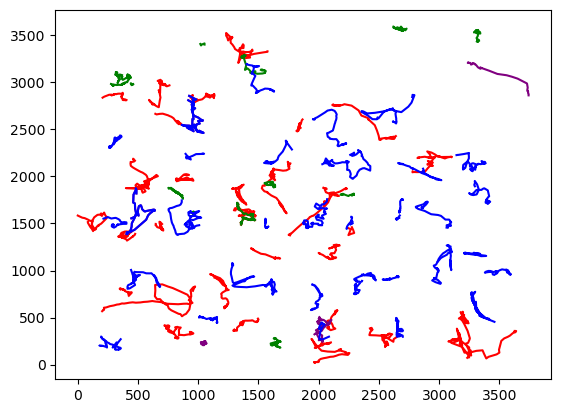

In [55]:
fig, ax = plt.subplots()

for pos,time,_ in zip(*dat54_500um): 
    ax.plot(pos[:,0],pos[:,1],color='red')
for pos,time,_ in zip(*dat54_500um_high): 
    ax.plot(pos[:,0],pos[:,1],color='green')
for pos,time,_ in zip(*dat54_control_high): 
    ax.plot(pos[:,0],pos[:,1],color='purple')
for pos,time,_ in zip(*dat54_control): 
    ax.plot(pos[:,0],pos[:,1],color='blue')    

#display(fig)
#plt.ion()

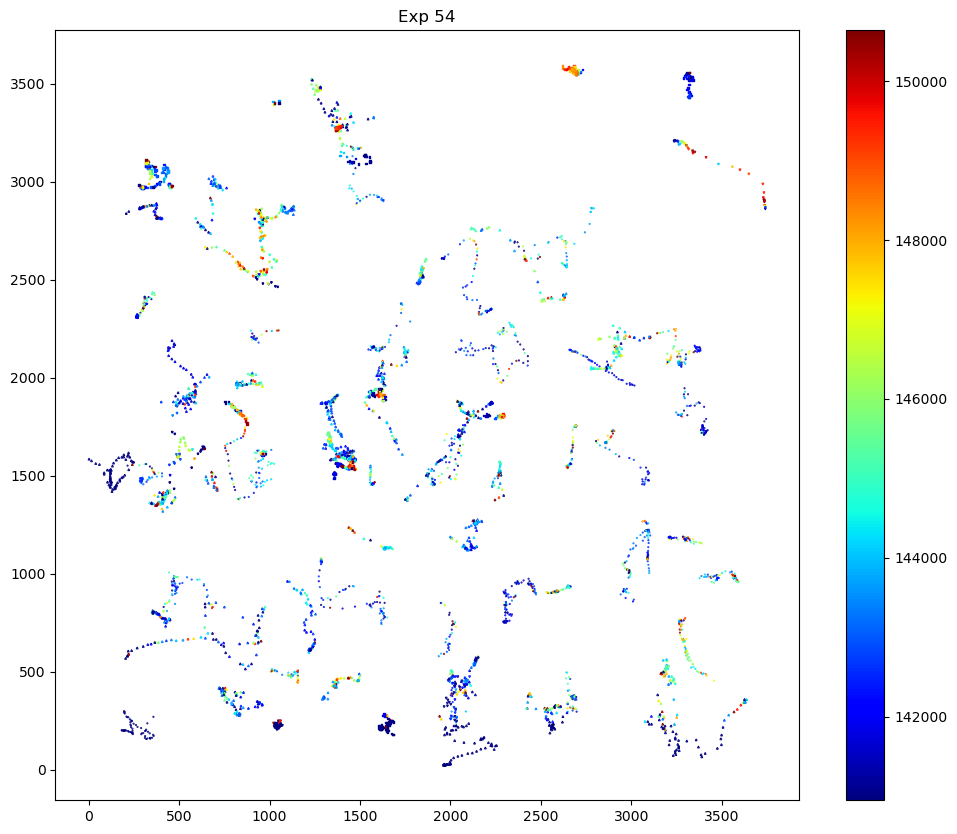

In [34]:
fig,ax = plt.subplots(1,figsize=(12,10))#,figsize=(15,5))
exp_label = 'Exp 54'
ax.set_title(exp_label)

from scipy.stats import pearsonr
max_fluo,min_fluo = 0,0 
fluo_exp = [] 
for dat,fluo in zip((dat54_control,dat54_control_high,dat54_500um,dat54_500um_high),
                    (dat_fluo54_control,dat_fluo54_control_high,dat_fluo54_500um,dat_fluo54_500um_high)):
    #avg_speeds,div_times = get_avg_speed(dat),get_div_times(dat)
    fluo_by_node = get_fluo_by_node(fluo)
    #avg_fluo = get_avg_fluo_track(dat,fluo_by_node)
    fluo_tracks = get_fluo_track(dat,fluo_by_node)
    max_fluo = max(np.nanmax(np.concatenate(fluo_track)),max_fluo)
    min_fluo = max(np.nanmin(np.concatenate(fluo_track)),min_fluo)
    fluo_exp.append(fluo_tracks)
    
for dat,fluo_tracks,lab,marker in zip((dat54_control,dat54_control_high,dat54_500um,dat54_500um_high),
                             #(tree54_control,tree54_control_high,tree54_500um,tree54_500um_high),
                             #(dat_fluo54_control,dat_fluo54_control_high,dat_fluo54_500um,dat_fluo54_500um_high),
                             fluo_exp,
                             ('control','control HF','500um','500um HF'),
                             ('.','v','^','s')):
  
    #fluo_by_node = get_fluo_by_node(fluo)
    #fluo_track = get_fluo_track(dat,fluo_by_node)
    for pos,_,_,c in zip(*dat,fluo_tracks):
        sc = ax.scatter(pos[:,0],pos[:,1],s=1.0,marker=marker,c=c,
                        vmin=min_fluo,vmax=max_fluo,
                        cmap='jet') 

#ax.legend(prop= {'size'   : 10})
#cbar = plt.colorbar(sc)
#cbar.ax.tick_params(labelsize=10)
#ax.set_xscale('log')
#plt.savefig('fluo_vs_lifetime_exp54.pdf',bbox_inches='tight')

# Speed histogram

/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


average speed Exp22,control: 0.6137224104198247
average speed Exp22,500um: 0.8040599489082161
average speed Exp 33,control: 0.23970514646710372
average speed Exp 33,500um: 0.4747382307024871
average speed Exp40,control: 0.2928290146613525
average speed Exp40,500um: 0.38870489875061986
average speed Exp54,control: 0.2649429296644757
average speed Exp54,500um: 0.2670200355165377


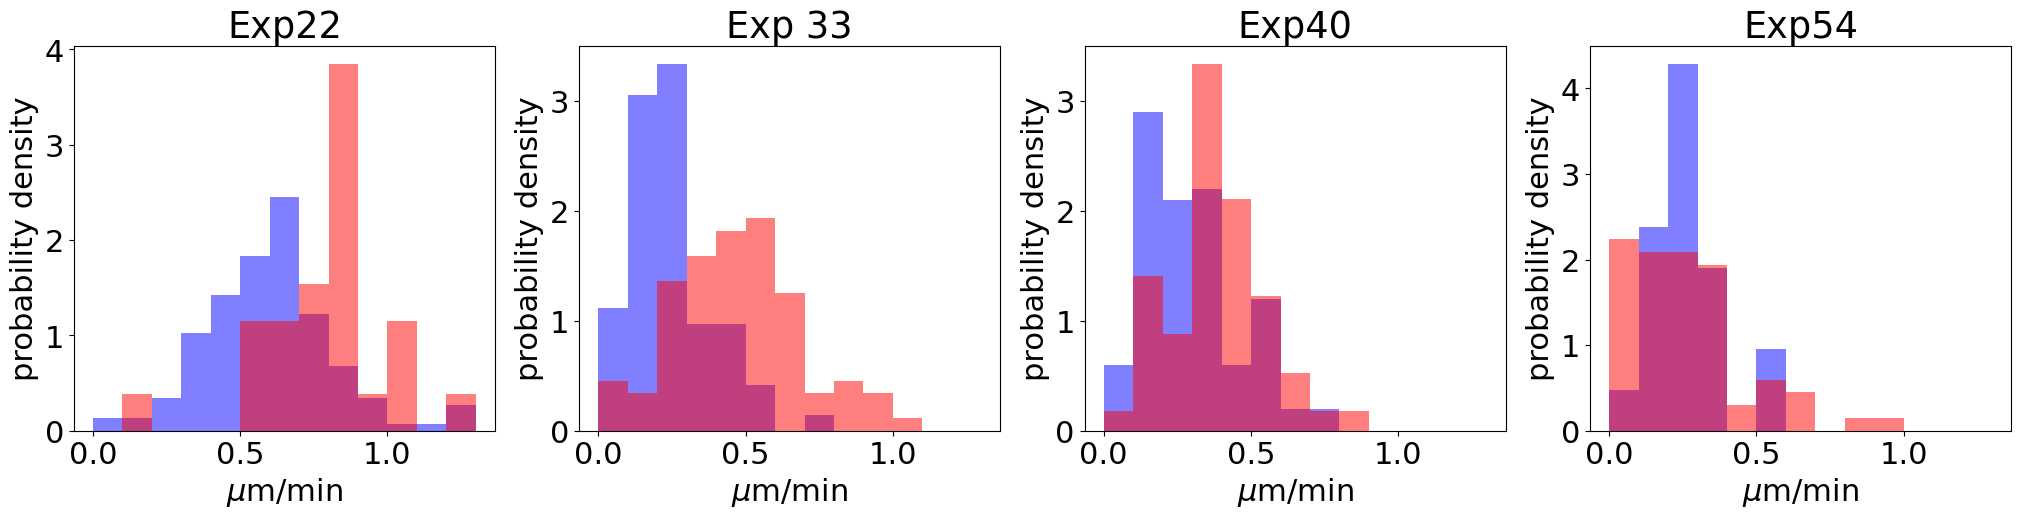

In [5]:
fig,ax = plt.subplots(1,4,figsize=(25,5))

for i,(control,treated,exp_label) in enumerate(zip( (dat22_control,dat33_control,dat40_control,dat54_500um),  (dat22_500um,dat33_500um,dat40_500um,dat22_hela_500um,dat54_500um),('Exp22','Exp 33','Exp40','Exp54'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('blue','red') ):
        ax[i].hist(get_avg_speed(dat),color=color,label=lab,density=True,alpha=0.5,bins=np.arange(0,1.4,0.1))
        print(f'average speed {exp_label},{lab}: {np.nanmean(get_avg_speed(dat))}')
    #ax[i].legend()
    ax[i].set_title(exp_label)
    ax[i].set_xlabel('$\mu$m/min')
    ax[i].set_ylabel('probability density')
#plt.savefig('distributions_avg_speed_22-33-40.pdf',bbox_inches='tight')

## For hela

average speed Exp22 hela,control: 0.2035308224230026
average speed Exp22 hela,500um: 0.17142101316467817


/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


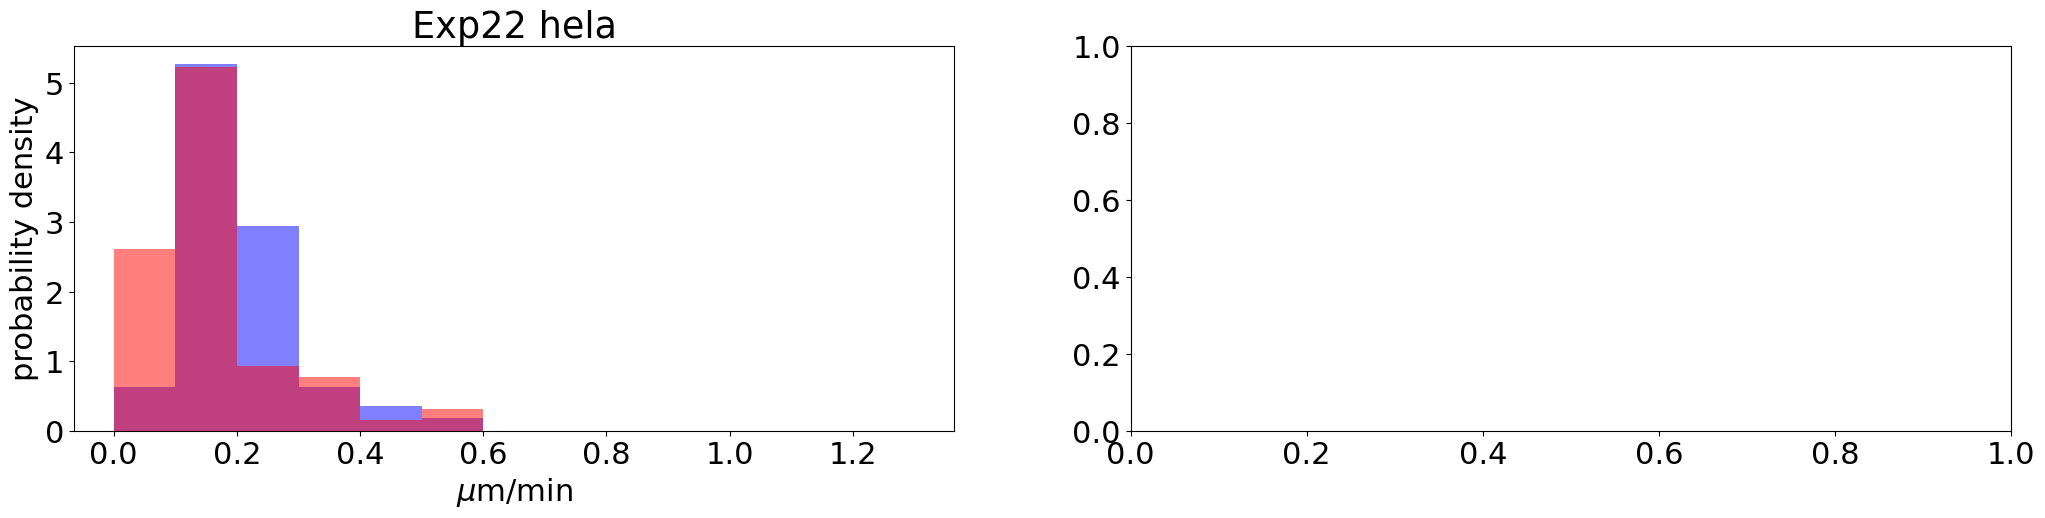

In [20]:
fig,ax = plt.subplots(1,2,figsize=(25,5))

for i,(control,treated,exp_label) in enumerate(zip( (dat22_hela_control,),  (dat22_hela_500um,),('Exp22 hela','Exp 33','Exp40','Exp54'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('blue','red') ):
        ax[i].hist(get_avg_speed(dat),color=color,label=lab,density=True,alpha=0.5,bins=np.arange(0,1.4,0.1))
        print(f'average speed {exp_label},{lab}: {np.nanmean(get_avg_speed(dat))}')
    #ax[i].legend()
    ax[i].set_title(exp_label)
    ax[i].set_xlabel('$\mu$m/min')
    ax[i].set_ylabel('probability density')
#plt.savefig('distributions_avg_speed_22-33-40.pdf',bbox_inches='tight')

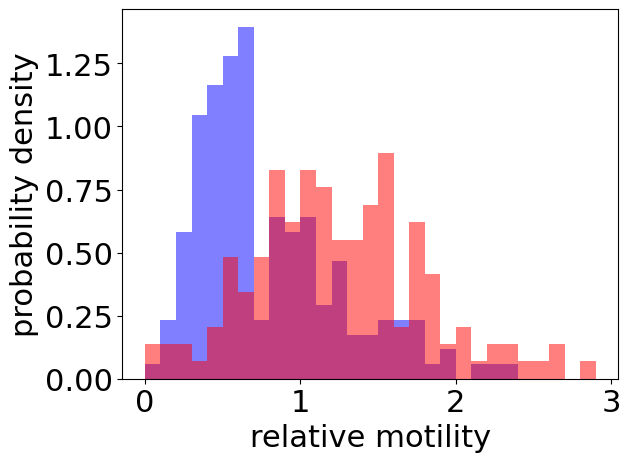

In [6]:

# pool 
fig,ax = plt.subplots()
control_dat = [get_avg_speed(z) for z in (dat33_control,dat40_control)]
tmz_dat = [get_avg_speed(z) for z in (dat33_500um,dat40_500um)]
means = [np.nanmean(np.concatenate((x,y))) for x,y in zip(control_dat,tmz_dat) ]

control_dat = [x[x> 0]/y for x,y in zip(control_dat,means)]
tmz_dat = [x[x>0]/y for x,y in zip(tmz_dat,means)]

ax.hist(np.concatenate(control_dat),color='blue',density=True,alpha=0.5,bins=np.arange(0,3.0,0.1))
ax.hist(np.concatenate(tmz_dat),color='red',density=True,alpha=0.5,bins=np.arange(0,3.0,0.1))
#ax.legend()
ax.set_xlabel('relative motility')
ax.set_ylabel('probability density')
plt.savefig('distributions_avg_speed_cumulated.pdf',bbox_inches='tight')

/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


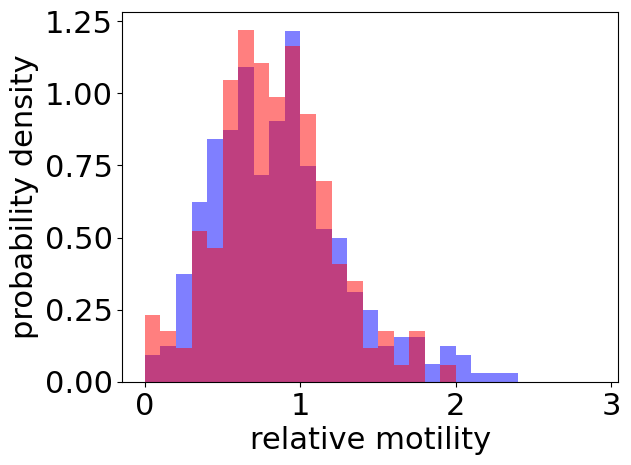

In [7]:
# pool 
fig,ax = plt.subplots()
control_dat = [get_avg_speed(z) for z in (dat22_control,dat33_control,dat40_control)]
tmz_dat = [get_avg_speed(z) for z in (dat22_500um,dat33_500um,dat40_500um)]
means = [np.nanmean(np.concatenate((x,y))) for x,y in zip(control_dat,tmz_dat) ]
 
control_dat = [x[x> 0]/y for x,y in zip(control_dat,means)]
tmz_dat = [x[x>0]/(1.5*y) for x,y in zip(tmz_dat,means)]

ax.hist(np.concatenate(control_dat),color='blue',density=True,alpha=0.5,bins=np.arange(0,3.0,0.1))
ax.hist(np.concatenate(tmz_dat),color='red',density=True,alpha=0.5,bins=np.arange(0,3.0,0.1))
#ax.legend()
ax.set_xlabel('relative motility')
ax.set_ylabel('probability density')
plt.savefig('distributions_avg_speed_cumulated.pdf',bbox_inches='tight')

# Displacement over time 

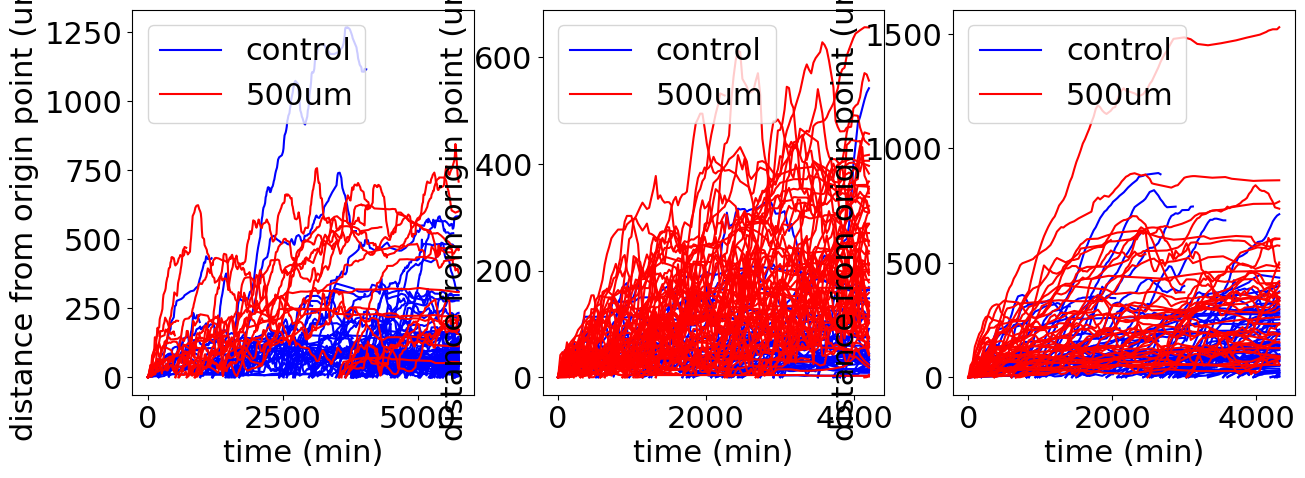

In [9]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

for i,(control,treated,exp_label) in enumerate(zip( (dat22_control,dat33_control,dat40_control),  (dat22_500um,dat33_500um,dat40_500um),('Exp22','Exp 33','Exp40'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('blue','red') ):
        first = True
        for time,disp,speed in zip(dat[1],get_displacement(dat),get_speed(dat)):
            if first: 
                ax[i].plot(time,disp,label=lab,color=color)
                first = False
            else: ax[i].plot(time,disp,color=color)
    ax[i].set_xlabel('time (min)')
    ax[i].set_ylabel('distance from origin point (um)')
    ax[i].legend()

# Max displacement

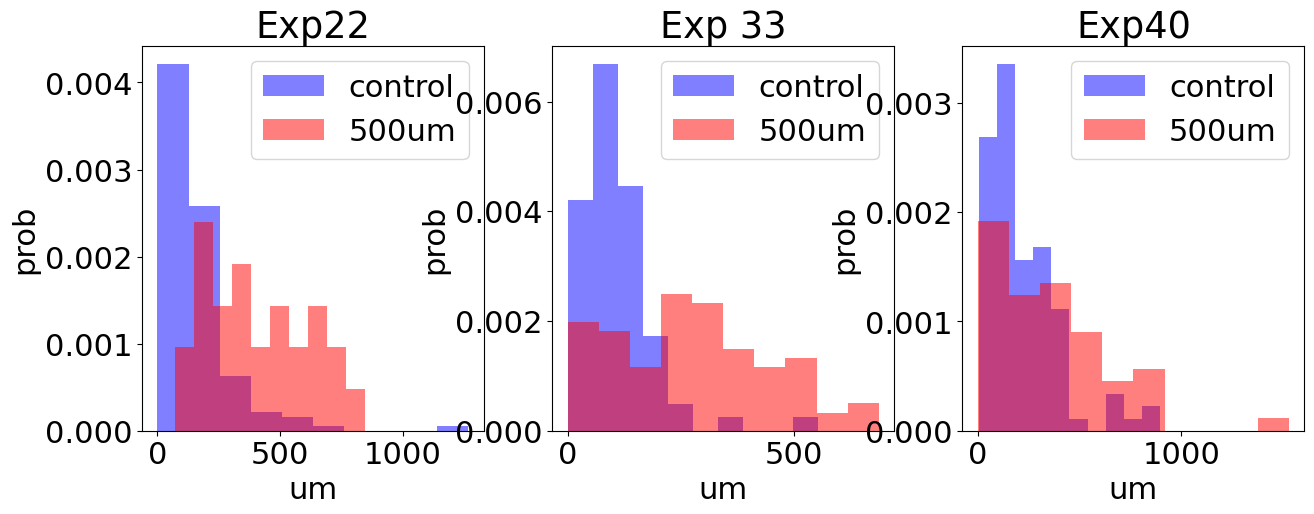

In [10]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

for i,(control,treated,exp_label) in enumerate(zip( (dat22_control,dat33_control,dat40_control),  (dat22_500um,dat33_500um,dat40_500um),('Exp22','Exp 33','Exp40'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('blue','red') ):
        ax[i].hist(get_max_displacement(dat),color=color,label=lab,density=True,alpha=0.5)
    ax[i].legend()
    ax[i].set_title(exp_label)
    ax[i].set_xlabel('um')
    ax[i].set_ylabel('prob')
    

# Distribution of instantaneous speed

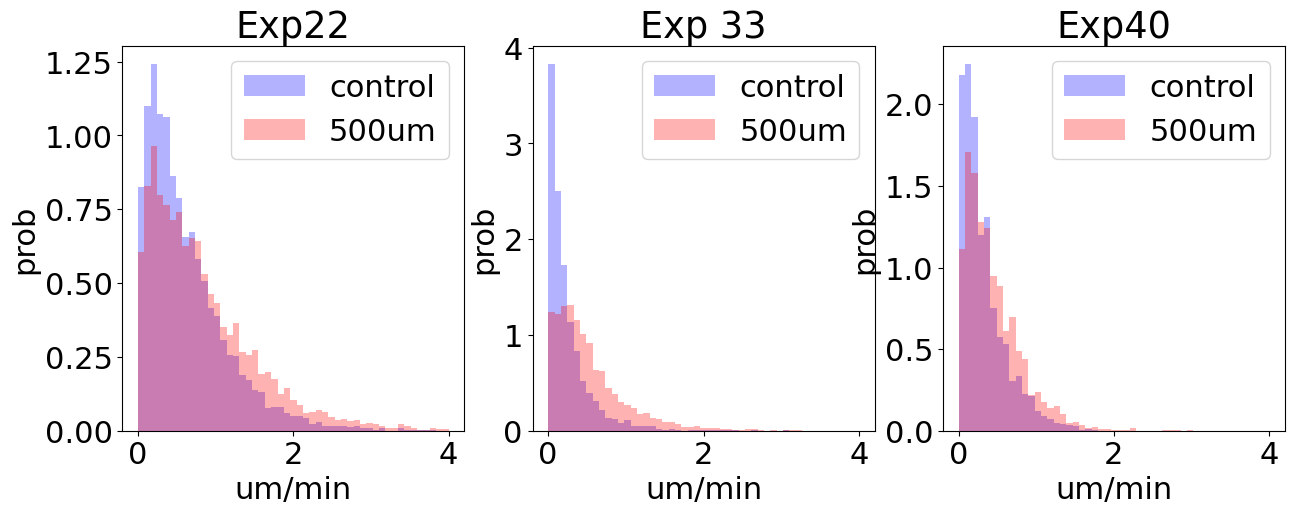

In [11]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

for i,(control,treated,exp_label) in enumerate(zip( (dat22_control,dat33_control,dat40_control),  (dat22_500um,dat33_500um,dat40_500um),('Exp22','Exp 33','Exp40'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('blue','red') ):
        all_speeds = np.concatenate(get_speed(dat))
        ax[i].hist(all_speeds,color=color,bins=np.linspace(0,4,50),alpha=0.3,density=True,label=lab)
    ax[i].legend()
    ax[i].set_title(exp_label)
    ax[i].set_xlabel('um/min')
    ax[i].set_ylabel('prob')

# Distance travelled vs speed

/tmp/ipykernel_860599/3774523252.py:20: RuntimeWarning: invalid value encountered in divide
  ax[i].scatter(av_speeds,max_distance/len_tracks,label=lab,color=color)


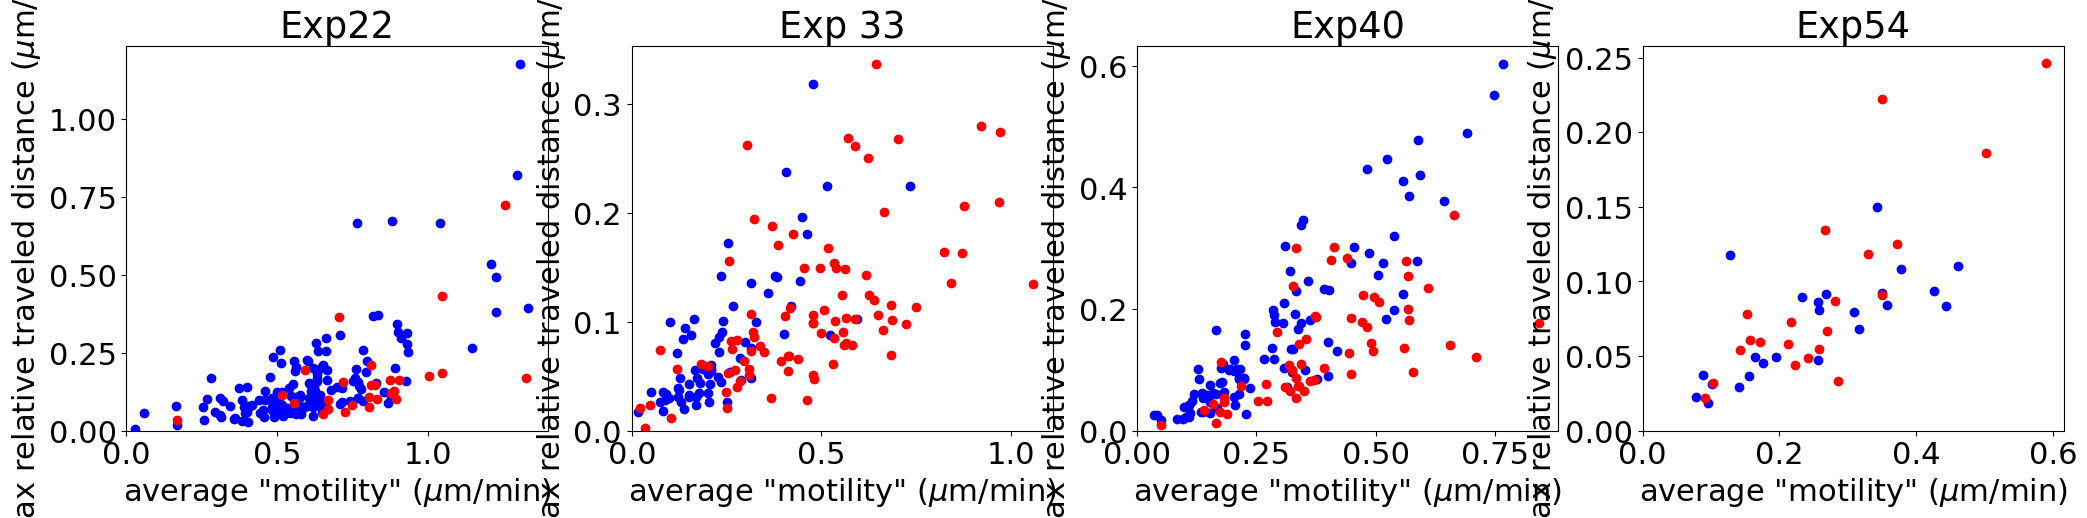

In [226]:
fig,ax = plt.subplots(1,4,figsize=(25,5))
from sklearn.linear_model import LinearRegression
for i,(control,treated,exp_label) in enumerate(zip( (dat22_control,dat33_control,dat40_control,dat54_control),  
                                                   (dat22_500um,dat33_500um,dat40_500um,dat54_500um),
                                                   ('Exp22','Exp 33','Exp40','Exp54'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('blue','red') ):
        first = True
        alltimes = np.concatenate(dat[1])
        min_time,max_time = np.min(alltimes),np.max(alltimes)
        av_speeds,max_distance = get_avg_speed(dat),get_max_displacement(dat)
        assert len(av_speeds) == len(max_distance)
        times_tracks = dat[1]
        len_tracks = np.array([x[-1] - x[0] for x in times_tracks])
        if(np.any(len_tracks == 1)): print(exp_label,lab)
        #valid_tracks = np.array(get_valid_tracks(dat)) 
        #av_speeds = av_speeds[valid_tracks]
        #max_distance = max_distance[valid_tracks]
        #len_tracks = len_tracks[valid_tracks]
        ax[i].scatter(av_speeds,max_distance/len_tracks,label=lab,color=color)
        #LinearRegression
    ax[i].set_xlabel('average "motility" ($\mu$m/min)')
    ax[i].set_ylabel('max relative traveled distance ($\mu$m/min)')
    ax[i].set_title(exp_label)
    ax[i].set_xlim(0)
    ax[i].set_ylim(0)
    #ax[i].legend()

# Motility vs division time 

In [10]:
# def get_div_times(dat):
#     div_times = []
#     alltimes = np.concatenate(dat[1])
#     min_time,max_time = np.min(alltimes),np.max(alltimes)
#     for pos,time,node_id in zip(*dat):
#         div_times.append(time[-1]-time[0])
#     return np.array(div_times)

# def get_valid_tracks(dat):
#     valid = []
#     alltimes = np.concatenate(dat[1])
#     min_time,max_time = np.min(alltimes),np.max(alltimes)
#     for pos,time,node_id in zip(*dat):
#         if time[0] == min_time or time[-1] == max_time: 
#             valid.append(False) 
#         else: 
#             valid.append(True)
#     return np.array(valid)

# def get_div_times(dat):
#     div_times = []
#     alltimes = np.concatenate(dat[1])
#     min_time,max_time = np.min(alltimes),np.max(alltimes)
#     for pos,time,node_id in zip(*dat):
#         if time[0] == min_time or time[-1] == max_time: 
#             div_times.append(-1) 
#         else: 
#             div_times.append(time[-1]-time[0])
#     return np.array(div_times)

# def plot_tree(tree):
#     from ete3 import TreeStyle,NodeStyle
#     ts = TreeStyle()
#     ts.scale =  10
#     ete_tree = create_tree_ete3(tree,None,None)
#     ete_tree.render('%%inline',tree_style=ts,h=1000)

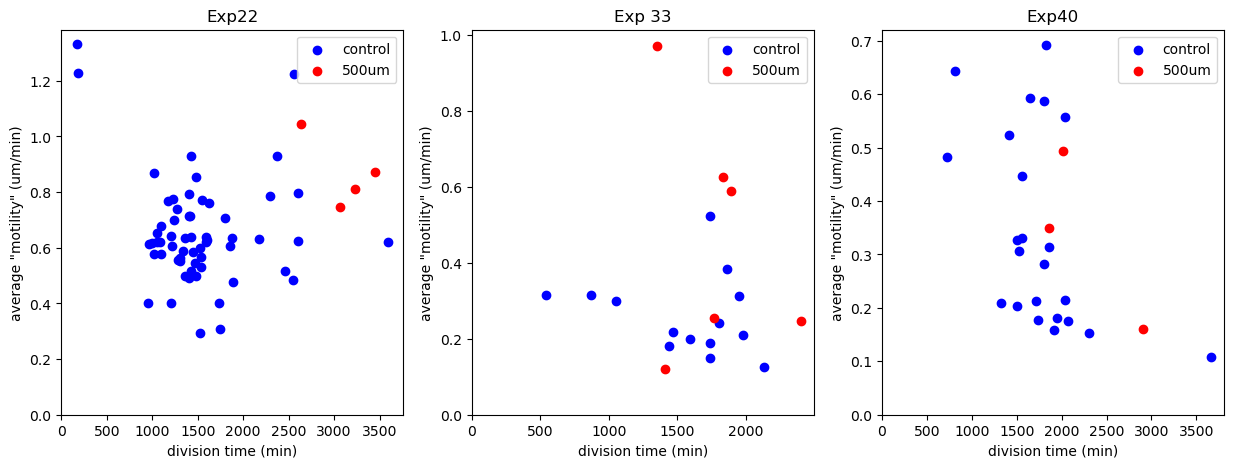

In [42]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

for i,(control,treated,exp_label) in enumerate(zip( (dat22_control,dat33_control,dat40_control),  (dat22_500um,dat33_500um,dat40_500um),('Exp22','Exp 33','Exp40'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('blue','red') ):
        first = True
        alltimes = np.concatenate(dat[1])
        min_time,max_time = np.min(alltimes),np.max(alltimes)
        av_speeds,div_times = get_avg_speed(dat),get_div_times(dat)
        assert len(av_speeds) == len(div_times)
        valid_tracks = np.array(get_valid_tracks(dat)) 
        av_speeds = np.array(av_speeds)[valid_tracks]
        div_times = div_times[valid_tracks]
        ax[i].scatter(div_times,av_speeds,label=lab,color=color)

    ax[i].set_xlabel('division time ({})'.format(time_unit))
    ax[i].set_ylabel('average "motility" (um/min)')
    ax[i].set_title(exp_label)
    ax[i].set_xlim(0)
    ax[i].set_ylim(0)
    ax[i].legend()

/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


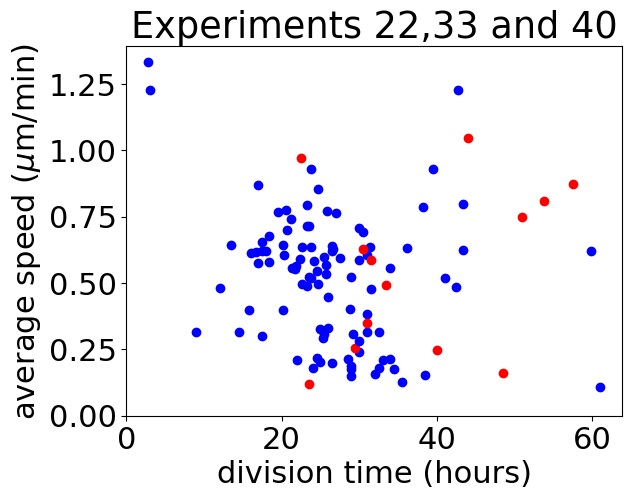

In [40]:
fig,ax = plt.subplots()#1,3,figsize=(15,5))
first = True
for i,(control,treated,exp_label) in enumerate(zip( (dat22_control,dat33_control,dat40_control),  (dat22_500um,dat33_500um,dat40_500um),('Exp22','Exp 33','Exp40'))):
    for dat,lab,color in zip((control,treated),('control','500um'),('blue','red') ):
        alltimes = np.concatenate(dat[1])
        av_speeds,div_times = get_avg_speed(dat),get_div_times(dat)
        assert len(av_speeds) == len(div_times)
        valid_tracks = np.array(get_valid_tracks(dat)) 
        av_speeds = np.array(av_speeds)[valid_tracks]
        div_times = div_times[valid_tracks]
        if not first: lab=None 
        ax.scatter(div_times/60,av_speeds,label=lab,color=color)
    first = False
ax.set_xlabel('division time (hours)'.format(time_unit))
ax.set_ylabel('average speed ($\mu$m/min)')
ax.set_title('Experiments 22,33 and 40')
ax.set_xlim(0)
ax.set_ylim(0)
#ax.legend()

plt.savefig('division_time_vs_motility.pdf',bbox_inches='tight')

# Lineage trees

## average speed tree

In [195]:
for i,(control,treated,tree_control,tree_treated,exp_label) in enumerate(
    zip((dat22_control,dat33_control,dat40_control),
        (dat22_500um,dat33_500um,dat40_500um),
        (tree22_control,tree33_control,tree40_control),  
        (tree22_500um,tree33_500um,tree40_500um),
        ('Exp22','Exp 33','Exp40'))):
    for dat,tree,lab in zip((control,treated),(tree_control,tree_treated),('control','500um')):
        ts = TreeStyle()
        ts.scale =  3
        ete_tree = create_tree_ete3(tree,None,None)
        speeds_id = get_speed(dat,by_id=True)
        avg_speed = get_avg_speed(dat)
        node_track = node_to_tracks(tree)
        maxspeed = max(avg_speed) # np.array(list(speeds_id.values())).max()
        
        for n in ete_tree.traverse('postorder'):
            n.img_style["size"] = 0 #this is required to ensure properly sized branches
            n.img_style["hz_line_width"] = 10
            #c=pow(node_to_vel[node.name]/max_vel,0.7)
            node_id = n.name
            if node_id == 'root': continue
            speed = avg_speed[node_track[node_id]]
            #if node_id in speeds_id:
            #    t = tree.time[node_id]
            # normalise speed 
            c = pow(speed/maxspeed,0.7)
            if np.isnan(c): 
                n.img_style['hz_line_color'] = '#%02x%02x%02x' % (0, 0,0 )
            else:
                n.img_style['hz_line_color'] = '#%02x%02x%02x' % (int(255*c), 0, int(255*(1-c)))
        ete_tree.render(f'./plots/tree_speed_{exp_label}_{lab}.pdf',tree_style=ts,h=1000)        

In [205]:
# Plot everyone at once 
# from glob import glob
# plt.figure(figsize=(20,10))
# columns = 2
# images = glob('./plots/tree_speed_*pdf')
# for i, image in enumerate(images):
#     image = render_pdf_notebook(image)
#     plt.subplot(len(images) // columns + 1, columns, i + 1)
#     ax = plt.gca()
#     ax.axis('off')
#     plt.imshow(image)
#     #render_pdf_notebook('/tmp/exp_Exp 33_control.pdf')

# MGMT fluorescence

In [14]:
exp_label = 'Exp40'
for dat,tree,fluo,lab,color in zip((dat40_control,dat40_500um),
                             (tree40_control,tree40_500um),
                             (dat_fluo40_control,dat_fluo40_500um),
                             ('control','500um'),
                             ('blue','red') ):
    fluo_by_node = get_fluo_by_node(fluo)
    #valid_tracks = get_valid_tracks(dat)
    avg_fluo_track = get_avg_fluo_track(dat,fluo_by_node)    
    max_fluo_track = max(avg_fluo_track)
    ete_tree = create_tree_ete3(tree,None,None)
    node_track = node_to_tracks(tree)
    ts = TreeStyle()
    ts.scale =  3
    for n in ete_tree.traverse('postorder'):
        n.img_style["size"] = 0 #this is required to ensure properly sized branches
        n.img_style["hz_line_width"] = 10
        #c=pow(node_to_vel[node.name]/max_vel,0.7)
        node_id = n.name
        if node_id == 'root': 
            continue
        #if node_id in fluo_by_node:
        track_id = node_track[node_id]
        avg_fluo = avg_fluo_track[track_id]
        t = tree.time[node_id]
        # normalise fluorescence 
        c = avg_fluo/max_fluo_track # (fluorescence_by_node[node_id]-min_fluo[t])/delta_fluo[t]
        n.img_style['hz_line_color'] = '#%02x%02x%02x' % (int(255*c), 0, int(255*(1-c)))
        
    ete_tree.render(f'./plots/tree_fluo_{exp_label}_{lab}.pdf',tree_style=ts,h=1000)   
    

/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)


## Fluo vs motility

/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


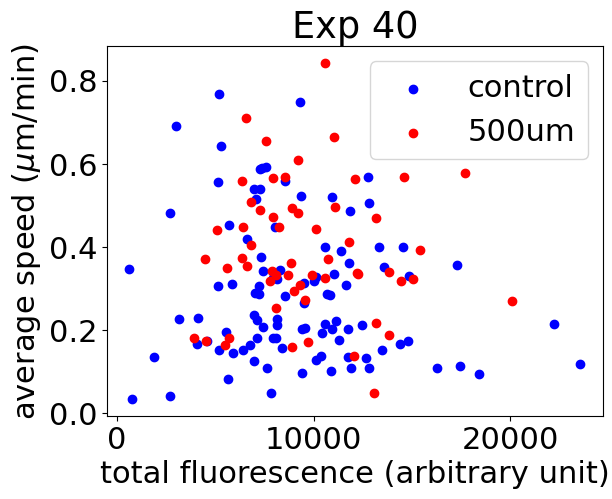

In [41]:
fig,ax = plt.subplots(1)#,figsize=(15,5))
exp_label = 'Exp 40'
dat = dat40_500um
lab = '500um'

for dat,xml,fluo,lab,color in zip((dat40_control,dat40_500um),
                             (tree40_control,tree40_500um),
                             (dat_fluo40_control,dat_fluo40_500um),
                             ('control','500um'),
                             ('blue','red') ):
    avg_speeds,div_times = get_avg_speed(dat),get_div_times(dat)
    fluo_by_node = get_fluo_by_node(fluo)
    avg_fluo = get_avg_fluo_track(dat,fluo_by_node)    
    valid_tracks = get_valid_tracks(dat) 
    #avg_speeds = avg_speeds[valid_tracks]
    #div_times = div_times[valid_tracks]
    #avg_fluo = avg_fluo[valid_tracks]
    ax.scatter(avg_fluo,avg_speeds,label=lab,color=color)
    ax.set_xlabel('total fluorescence (arbitrary unit)')
    ax.set_ylabel('average speed ($\mu$m/min)')
    ax.set_title(exp_label)
ax.legend()
plt.savefig('avg_speed_vs_fluorescence_exp40.pdf',bbox_inches='tight')

/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)


control 0.2518105001127905 0.1364744408271327
control high fluorescence 0.3275651637663573 0.09721973746350694


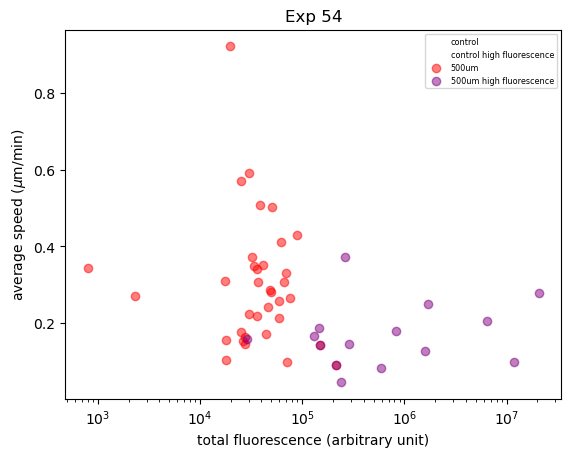

In [50]:
fig,ax = plt.subplots(1)#,figsize=(15,5))
exp_label = 'Exp 54'
for dat,xml,fluo,lab,color in zip((dat54_control,dat54_control_high,dat54_500um,dat54_500um_high),
                             (tree54_control,tree54_control_high,tree54_500um,tree54_500um_high),
                             (dat_fluo54_control,dat_fluo54_control_high,dat_fluo54_500um,dat_fluo54_500um_high),
                             ('control','control high fluorescence','500um','500um high fluorescence'),
                             ('blue','yellow','red','purple')):
    avg_speeds,div_times = get_avg_speed(dat),get_div_times(dat)
    fluo_by_node = get_fluo_by_node(fluo)
    avg_fluo = get_avg_fluo_track(dat,fluo_by_node)    
    valid_tracks = get_valid_tracks(dat) 
    #avg_speeds = avg_speeds[valid_tracks]
    #div_times = div_times[valid_tracks]
    #avg_fluo = avg_fluo[valid_tracks]
    alpha = 0.5 
    if 'control' in lab:
        print(lab,avg_speeds.mean(),avg_speeds.std())
        alpha = 0 
    ax.scatter(avg_fluo,avg_speeds,label=lab,color=color,alpha=alpha)
    ax.set_xlabel('total fluorescence (arbitrary unit)')
    ax.set_ylabel('average speed ($\mu$m/min)')
    ax.set_title(exp_label)
    
ax.legend()
ax.legend(fontsize='xx-small')
ax.set_xscale('log')
plt.savefig('avg_speed_vs_fluorescence_exp54.pdf',bbox_inches='tight')

# Fluo vs life time

### Exp40

/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


control PearsonRResult(statistic=0.19587579898826848, pvalue=0.050808309977536846)
500um PearsonRResult(statistic=0.44157618181880565, pvalue=0.0005205989601329517)


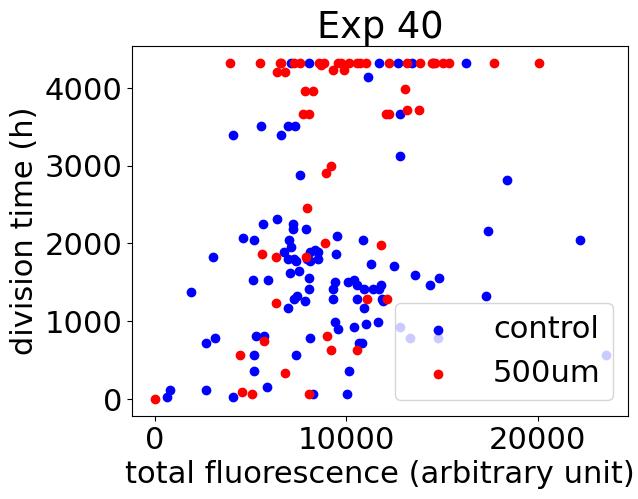

In [42]:
fig,ax = plt.subplots(1)#,figsize=(15,5))
exp_label = 'Exp 40'
dat = dat40_500um
lab = '500um'
from scipy.stats import pearsonr
for dat,xml,fluo,lab,color in zip((dat40_control,dat40_500um),
                             (tree40_control,tree40_500um),
                             (dat_fluo40_control,dat_fluo40_500um),
                             ('control','500um'),
                             ('blue','red') ):
    avg_speeds,div_times = get_avg_speed(dat),get_div_times(dat)
    fluo_by_node = get_fluo_by_node(fluo)
    avg_fluo = get_avg_fluo_track(dat,fluo_by_node)   
    #valid_tracks = get_valid_tracks(dat)
    #div_times = div_times[valid_tracks]
    #avg_fluo = avg_fluo[valid_tracks]
    track_lens = [t[-1] - t[0] for t in dat[1]]
    print(lab,pearsonr(avg_fluo, track_lens))

    ax.scatter(avg_fluo,track_lens,label=lab,color=color)
    ax.set_xlabel('total fluorescence (arbitrary unit)')
    ax.set_ylabel('division time (h)')
    ax.set_title(exp_label)
ax.legend()
plt.savefig('fluo_vs_lifetime_exp40.pdf',bbox_inches='tight')

### Exp 54

/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)


control PearsonRResult(statistic=0.5165209369757062, pvalue=0.00039130438584451745)
control HF PearsonRResult(statistic=-0.6272922298231738, pvalue=0.2573215832945076)
500um PearsonRResult(statistic=0.21899338881652114, pvalue=0.20625186243895183)
500um HF PearsonRResult(statistic=-0.3684708501415397, pvalue=0.17656480278292186)


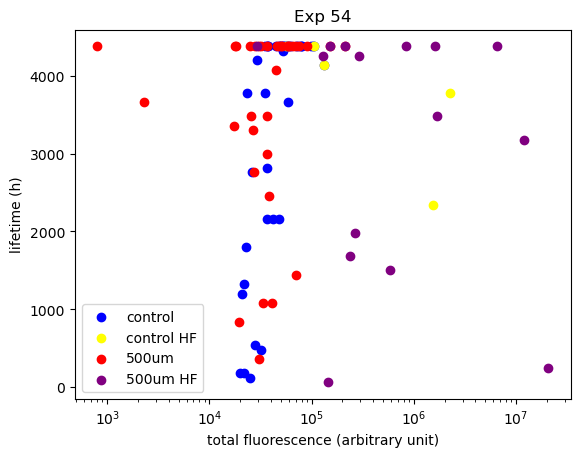

In [51]:
fig,ax = plt.subplots(1)#,figsize=(15,5))
exp_label = 'Exp 54'
ax.set_title(exp_label)
#dat = dat40_500um
#lab = '500um'
from scipy.stats import pearsonr
for dat,xml,fluo,lab,color in zip((dat54_control,dat54_control_high,dat54_500um,dat54_500um_high),
                             (tree54_control,tree54_control_high,tree54_500um,tree54_500um_high),
                             (dat_fluo54_control,dat_fluo54_control_high,dat_fluo54_500um,dat_fluo54_500um_high),
                             ('control','control HF','500um','500um HF'),
                             ('blue','yellow','red','purple')):
    
    avg_speeds,div_times = get_avg_speed(dat),get_div_times(dat)
    fluo_by_node = get_fluo_by_node(fluo)
    avg_fluo = get_avg_fluo_track(dat,fluo_by_node)   
    #valid_tracks = get_valid_tracks(dat)
    #div_times = div_times[valid_tracks]
    #avg_fluo = avg_fluo[valid_tracks]
    track_lens = [t[-1] - t[0] for t in dat[1]]
    print(lab,pearsonr(avg_fluo, track_lens))

    ax.scatter(avg_fluo,track_lens,label=lab,color=color)
    ax.set_xlabel('total fluorescence (arbitrary unit)')
    ax.set_ylabel('lifetime (h)')

ax.legend(prop= {'size'   : 10})
ax.set_xscale('log')

plt.savefig('fluo_vs_lifetime_exp54.pdf',bbox_inches='tight')

/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)


500um PearsonRResult(statistic=0.21899338881652114, pvalue=0.20625186243895183)
500um 3610.285714285714 1207.4754909415303
500um HF PearsonRResult(statistic=-0.3684708501415397, pvalue=0.17656480278292186)
500um HF 3128.0 1547.3125088358847


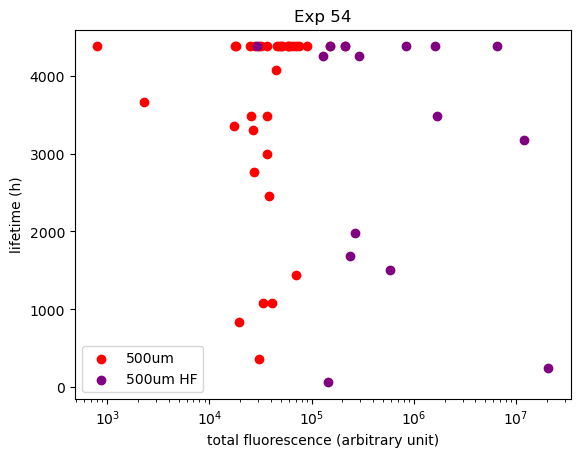

In [52]:
fig,ax = plt.subplots(1)#,figsize=(15,5))
exp_label = 'Exp 54'
ax.set_title(exp_label)
#dat = dat40_500um
#lab = '500um'
from scipy.stats import pearsonr

alldat = [[dat22_500um,tree22_500um],
          [dat22_control,tree22_control],

for dat,xml,fluo,lab,color in zip((dat54_500um,dat54_500um_high),
                             (tree54_500um,tree54_500um_high),
                             (dat_fluo54_500um,dat_fluo54_500um_high),
                             ('500um','500um HF'),
                             ('red','purple')):
    
    avg_speeds,div_times = get_avg_speed(dat),get_div_times(dat)
    fluo_by_node = get_fluo_by_node(fluo)
    avg_fluo = get_avg_fluo_track(dat,fluo_by_node)   
    #valid_tracks = get_valid_tracks(dat)
    #div_times = div_times[valid_tracks]
    #avg_fluo = avg_fluo[valid_tracks]
    track_lens = np.array([t[-1] - t[0] for t in dat[1]])
    print(lab,pearsonr(avg_fluo, track_lens))
    print(lab,track_lens.mean(),track_lens.std())

    ax.scatter(avg_fluo,track_lens,label=lab,color=color)
    ax.set_xlabel('total fluorescence (arbitrary unit)')
    ax.set_ylabel('lifetime (h)')

ax.legend(prop= {'size'   : 10})
ax.set_xscale('log')

#plt.savefig('fluo_vs_lifetime_exp54.pdf',bbox_inches='tight')

# Division times 

Divisions are segerated into 3 types:
- `1` is a proper division (between two division)
- `0` is where no division occured
- `-1` if there is a division but the track either started at t=0 or hasn't divided before the end

## Individual experiments

Exp22 control 	 mean: 22.40492170022371 std: 16.601632120082147
Exp22 500um 	 mean: 54.043209876543216 std: 28.76145656838985
Exp33 control 	 mean: 28.971691724989146 std: 17.08584318816726
Exp33 500um 	 mean: 46.780651648935645 std: 23.72441554768426
Exp40 control 	 mean: 28.99 std: 18.292482062311826
Exp40 500um 	 mean: 52.666666666666664 std: 24.878711630582096


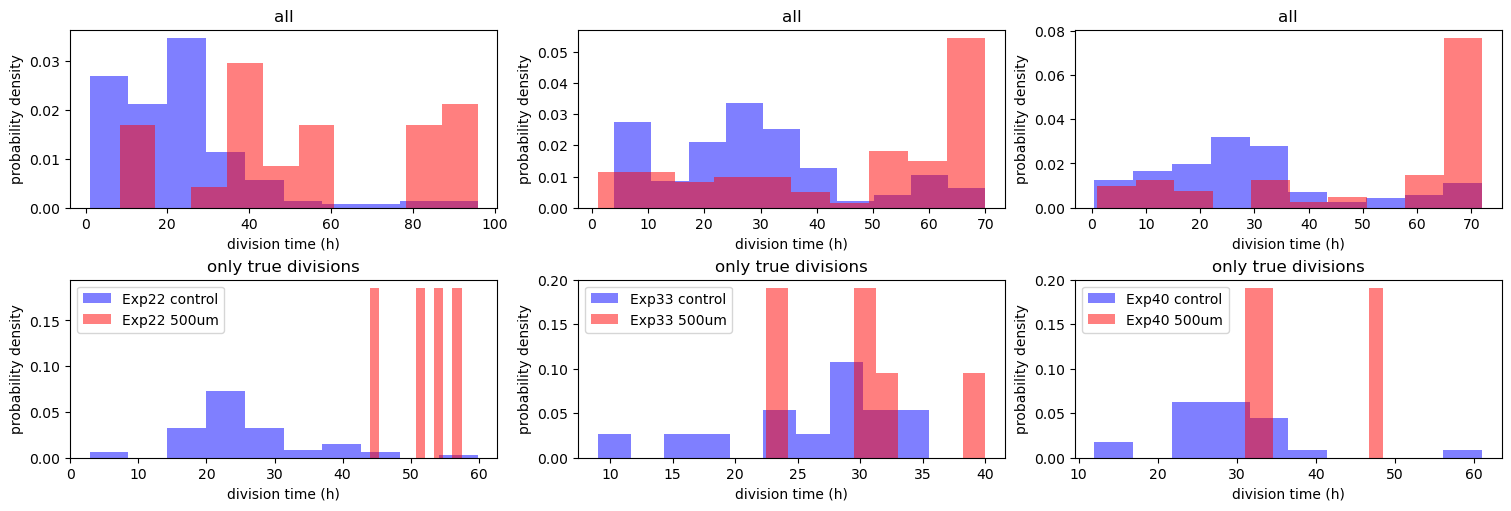

In [299]:
fig,ax = plt.subplots(2,3,figsize=(15,5),layout='constrained')

all_div_times,all_div_types = {},{} 
for i,(control,treated,tree_control,tree_treated,exp_label) in enumerate(zip( 
                                                  (dat22_control,dat33_control,dat40_control),  
                                                   (dat22_500um,dat33_500um,dat40_500um),
                                                    (tree22_control,tree33_control,tree40_control), 
                                                    (tree22_500um,tree33_500um,tree40_500um),
                                                   ('Exp22','Exp33','Exp40'))):
    for dat,tree,lab,color in zip((control,treated),(tree_control,tree_treated),('control','500um'),('blue','red')
    ):
        div_times,div_types = get_div_times(dat)
        div_times  = div_times/60
        all_div_times[exp_label+'_'+lab] = div_times
        all_div_types[exp_label+'_'+lab] = div_types
        print('{} {} \t mean: {} std: {}'.format(exp_label,lab,div_times.mean(),div_times.std()))

        for j,lab_div_type,cnd in zip(range(2),['all','only true divisions'],[div_types > -2,div_types == 1]):
            ax[j][i].hist(div_times[cnd],label=exp_label+' '+lab,color=color,density=True,alpha=0.5)
            ax[j][i].set_xlabel('division time (h)')
            ax[j][i].set_ylabel('probability density') 
            ax[j][i].set_title(lab_div_type)
        ax[j][i].legend()
        

## Pooled

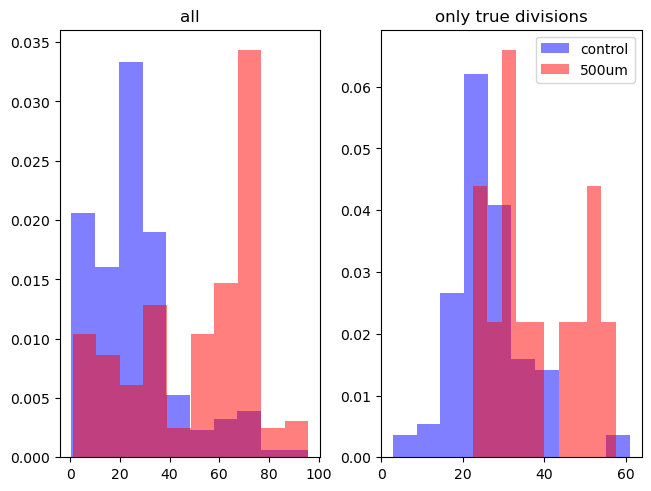

In [316]:
# Pool everything
fig, ax = plt.subplots(1,2,layout='constrained')

labs = all_div_times.keys()

all_control_times = np.concatenate([all_div_times[e] for e in labs if 'control' in e])
all_treated_times = np.concatenate([all_div_times[e] for e in labs if '500um' in e])
all_control_types = np.concatenate([all_div_types[e] for e in labs if 'control' in e])
all_treated_types = np.concatenate([all_div_types[e] for e in labs if '500um' in e])


for times,types,lab,color in zip( (all_control_times,all_treated_times),
                                  (all_control_types,all_treated_types),
                                  ('control','500um'),
                                  ('blue','red')
                                ):
    for j,lab_div_type,cnd in zip(range(2),['all','only true divisions'],[types > -2,types == 1]):
        ax[j].hist(times[cnd ],label=lab,color=color,density=True,alpha=0.5)
        ax[j].set_title(lab_div_type)
    ax[j].legend()

### Export to pandas csv/pickle

In [283]:
def stack_padding(l,fillvalue):
    import itertools
    return np.column_stack((itertools.zip_longest(*l, fillvalue=fillvalue)))

all_div_times_pad = { k:v for k,v in zip(all_div_times.keys(),stack_padding(all_div_times.values(),np.NaN))}
all_div_types_pad = { k:v for k,v in zip(all_div_types.keys(),stack_padding(all_div_types.values(),np.NaN))}


/tmp/ipykernel_2914474/4256485490.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.column_stack((itertools.zip_longest(*l, fillvalue=fillvalue)))


In [284]:
df_times = pd.DataFrame.from_dict(all_div_times_pad)
df_types = pd.DataFrame.from_dict(all_div_types_pad)

In [285]:
df2 = pd.concat({'div time (h)':df_times,'div type':df_types },axis=1)

In [286]:
df2 = df2.swaplevel(0,1,axis=1).sort_index(axis=1)

In [287]:
df2

Exp22_500um          Exp22_control           Exp33_500um           \
    div time (h) div type  div time (h) div type div time (h) div type   
0      87.333333     -1.0     31.500000     -1.0     2.999779     -1.0   
1      30.333333     -1.0     42.666667      1.0    66.495111     -1.0   
2      95.833333      0.0     28.333333     -1.0    66.495111     -1.0   
3       9.333333     -1.0     28.333333     -1.0    69.994854      0.0   
4      86.333333     -1.0     19.833333     -1.0    69.994854      0.0   
..           ...      ...           ...      ...          ...      ...   
144          NaN      NaN     11.833333     -1.0          NaN      NaN   
145          NaN      NaN     11.833333     -1.0          NaN      NaN   
146          NaN      NaN     24.500000     -1.0          NaN      NaN   
147          NaN      NaN     39.500000      1.0          NaN      NaN   
148          NaN      NaN     31.500000     -1.0          NaN      NaN   

    Exp33_control           Exp40_500um          Exp40_control           
     div time (h) div type div time (h) div type  div time (h) div type  
0       28.499478     -1.0         41.0     -1.0          32.5      1.0  
1       40.499258     -1.0         30.5     -1.0          25.5     -1.0  
2       40.499258     -1.0         30.5     -1.0          25.5     -1.0  
3        8.499844     -1.0         72.0      0.0          58.5     -1.0  
4       60.998883     -1.0         50.0     -1.0          15.5     -1.0  
..            ...      ...          ...      ...           ...      ...  
144           NaN      NaN          NaN      NaN           NaN      NaN  
145           NaN      NaN          NaN      NaN           NaN      NaN  
146           NaN      NaN          NaN      NaN           NaN      NaN  
147           NaN      NaN          NaN      NaN           NaN      NaN  
148           NaN      NaN          NaN      NaN           NaN      NaN  

[149 rows x 12 columns]

In [ ]:
df2.to_csv('output_data/div_time_22-33-40.csv')
df2.to_pickle('output_data/div_time_22-33-40.pkl')